## Análise Descritiva - Descriptive Analysis

A análise descritiva consiste em sumarizar, organizar e visualizar dados de forma a torná-los mais compreensíveis, servindo de base para todas as etapas posteriores de uma solução de ciência de dados. No contexto de **Python**, bibliotecas como ```pandas``` e ```numpy``` oferecem métodos eficientes para calcular estatísticas resumidas — como média, mediana, variância e desvio‐padrão — enquanto ```matplotlib``` e ```seaborn``` permitem visualizar distribuições e identificar tendências, padrões e outliers de forma intuitiva. A combinação desses elementos não só facilita o entendimento inicial dos dados, mas também embasa decisões informadas para modelagem preditiva ou análises mais avançadas. 


---
### Introdução à Análise Descritiva
- A análise descritiva é o processo de sumarizar e organizar dados de forma quantitativa e visual, sem buscar inferências para além da amostra analisada. Ela fornece insight imediato sobre as características principais do conjunto de dados, como seu “centro” e a forma como os valores se espalham em torno dele 
GeeksforGeeks. No fluxo de trabalho de ciência de dados, a etapa de análise descritiva — também chamada de “Exploratory Data Analysis (EDA)” — é fundamental para detectar inconsistências, outliers e padrões iniciais antes de aplicar algoritmos de machine learning.


---
### Técnicas e Métricas Principais
**Medidas de Tendência Central**
- **Média:** soma dos valores dividida pelo número de observações, sensível a outliers.
- **Mediana:** valor que divide a distribuição em duas metades iguais, robusta contra valores extremos.
- **Moda:** valor mais frequente no conjunto de dados.

**Medidas de Dispersão**
- **Amplitude (Range):** diferença entre o maior e o menor valor.
- **Variância:** média dos quadrados dos desvios em relação à média, dá peso a desvios maiores.
- **Desvio‐Padrão:** raiz quadrada da variância, expressa dispersão na mesma unidade dos dados.
- **Intervalo Interquartílico (IQR):** diferença entre o terceiro e o primeiro quartil, foca no “corpo” da distribuição.

**Distribuição de Dados**
Para entender a forma dos dados, utilizamos visualizações como:
- **Histograma:** mostra a frequência de valores em “bins” contíguas.
- **Boxplot:** ilustra mediana, quartis e possíveis outliers em um gráfico de caixa.
- **Gráfico de Densidade (KDE):** estimativa suave da distribuição de probabilidade .


---
### Ferramentas Python para Análise Descritiva
**pandas**
A principal biblioteca para manipulação de dados tabulares em **Python**, com o método ```DataFrame.describe()``` para gerar estatísticas básicas de forma rápida 

**NumPy**
Oferece arrays eficientes e funções como ```np.mean()```, ```np.median()```, ```np.var()``` e ```np.std()``` para cálculos numéricos de alto desempenho.

**matplotlib**
Biblioteca padrão para criação de gráficos em **Python**, permitindo personalizar histograms, boxplots e muito mais.

**seaborn**
Construída sobre **matplotlib**, fornece uma interface de mais alto nível para gráficos estatísticos, como ```sns.histplot()``` e ```sns.boxplot()```.

---
### Exemplo em Python

**Empresa: Construtora LTDA**
**Faturamento total por ano**
- Faturamento 2020:  8.500.000,00 
- Faturamento 2021:  7.450.000,00 
- Faturamento 2022:  6.800.000,00 
- Faturamento 2023:  8.000.500,00 
- Faturamento 2024:  8.500.000,00 

**Custo médio total por ano**
- Custo 2020: 82% do faturamento 
- Custo 2021: 78% do faturamento 
- Custo 2022: 85% do faturamento 
- Custo 2023: 77,5% do faturamento 
- Custo 2022: 76,9% do faturamento 


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Montagem dos dados
years = [2020, 2021, 2022, 2023, 2024]
revenue = [8_500_000, 7_450_000, 6_800_000, 8_000_500, 8_500_000]
cost_pct = [0.82, 0.78, 0.85, 0.775, 0.769]  # Último valor corresponde a 2024

df = pd.DataFrame({
    'Ano': years,
    'Faturamento': revenue,
    'Custo (%)': cost_pct
})
df['Custo'] = df['Faturamento'] * df['Custo (%)']

# 2. Medidas de Tendência Central
central = pd.DataFrame({
    'Média': df[['Faturamento', 'Custo']].mean(),
    'Mediana': df[['Faturamento', 'Custo']].median(),
    'Moda': df[['Faturamento', 'Custo']].mode().iloc[0]
})

# 3. Medidas de Dispersão
dispersion = pd.DataFrame({
    'Amplitude (Range)': df[['Faturamento', 'Custo']].max() - df[['Faturamento', 'Custo']].min(),
    'Variância': df[['Faturamento', 'Custo']].var(ddof=0),
    'Desvio Padrão': df[['Faturamento', 'Custo']].std(ddof=0),
    'IQR': df[['Faturamento', 'Custo']].quantile(0.75) - df[['Faturamento', 'Custo']].quantile(0.25)
})

# Exibição dos dados
display(df)
display(central)
display(dispersion)

,Ano,Faturamento,Custo (%),Custo
0,2020,8500000,0.820,6970000.0
1,2021,7450000,0.780,5811000.0
2,2022,6800000,0.850,5780000.0
3,2023,8000500,0.775,6200387.5
4,2024,8500000,0.769,6536500.0


,Média,Mediana,Moda
Faturamento,7850100.0,8000500.0,8500000.0
Custo,6259577.5,6200387.5,5780000.0


,Amplitude (Range),Variância,Desvio Padrão,IQR
Faturamento,1700000.0,4.260300e+11,652709.767048,1050000.0
Custo,1190000.0,2.032212e+11,450800.622809,725500.0


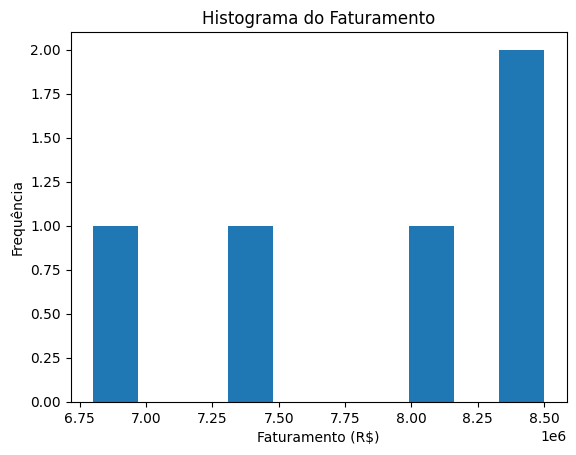

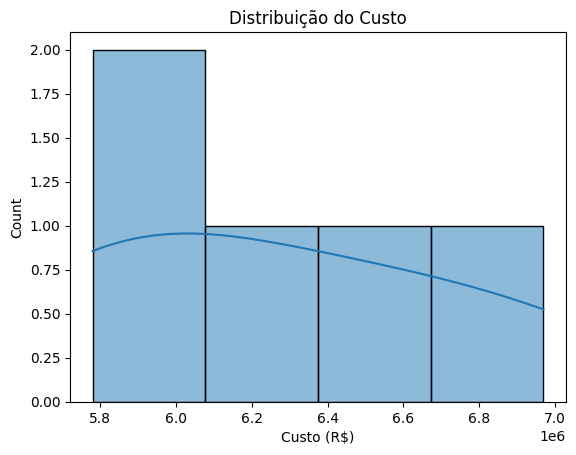

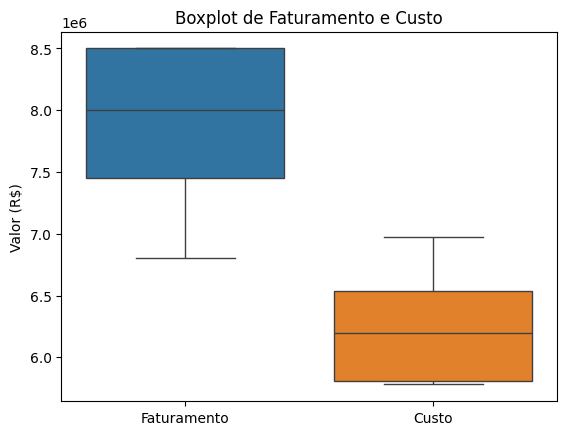

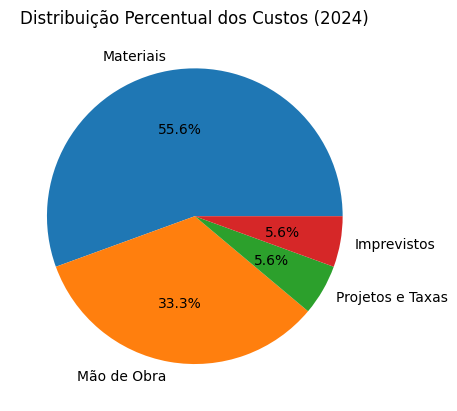

In [5]:
# 4. Visualizações de Distribuição
# Histograma de Faturamento
plt.figure()
plt.hist(df['Faturamento'])
plt.title('Histograma do Faturamento')
plt.xlabel('Faturamento (R$)')
plt.ylabel('Frequência')
plt.show()

# Histograma e KDE do Custo
plt.figure()
sns.histplot(df['Custo'], kde=True)
plt.title('Distribuição do Custo')
plt.xlabel('Custo (R$)')
plt.show()

# Boxplot comparativo
plt.figure()
sns.boxplot(data=df[['Faturamento', 'Custo']])
plt.title('Boxplot de Faturamento e Custo')
plt.ylabel('Valor (R$)')
plt.show()

# 5. Distribuição percentual dos custos por categoria (para 2024)
categories = {
    'Materiais': 0.50,
    'Mão de Obra': 0.30,
    'Projetos e Taxas': 0.05,
    'Imprevistos': 0.05
}
latest_cost = df.loc[df['Ano'] == 2024, 'Custo'].iloc[0]
breakdown = {k: latest_cost * v for k, v in categories.items()}

# Pizza de distribuição
plt.figure()
plt.pie(break_df['Valor (R$)'], labels=break_df.index, autopct='%1.1f%%')
plt.title('Distribuição Percentual dos Custos (2024)')
plt.show()